In [1]:
import cv2
import numpy as np
import keras 
from keras.models import Sequential 
from keras.layers import Dropout, Flatten, MaxPooling2D 
from keras.layers import Dense,Conv2D  
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import img_to_array, load_img
import PIL
from PIL import Image
import splitfolders

print("Import complete")


Import complete


In [2]:
import numpy as np
import pandas as pd                                 
import matplotlib.pyplot as plt                      
from sklearn.model_selection import train_test_split 
import warnings                                     
warnings.filterwarnings("ignore")
import os
import pandas as pd
import cv2
import glob 
import os
print("numpy version:", np.__version__)           
print("pandas version:", pd.__version__)         

numpy version: 1.19.2
pandas version: 1.1.3


In [5]:
input_folder = r'C:\Users\Shireen.intel\Desktop\Shireen\Wet waste new'
output = r"C:\Users\Shireen.intel\Desktop\Shireen\Wet waste new"
splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.75,.25))

Copying files: 7434 files [02:15, 54.76 files/s]


In [ ]:
import cv2
import glob 
import os

path = os.getcwd()+r'.\WASTE MANAGER PROGRAM\test\Dry waste'
os.chdir(path)
    
images = glob.glob('*.jpg')

folder = 'resized'
if not os.path.exists(folder):
    os.makedirs(folder)

for image in images:
    img=cv2.imread(image,1)
    re=cv2.resize(img,(int(img.shape[1]/4),int(img.shape[0]/4)))
    cv2.imshow('Checking...',re)
    cv2.waitKey(500)
    cv2.destroyAllWindows()
    cv2.imwrite(folder + '/' + 'resized_'+image, re)
path = r'C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM'
os.chdir(path)

In [12]:
path = os.getcwd()
os.chdir(path)
    
images = glob.glob('*.jpg')

folder = 'resized'
if not os.path.exists(folder):
    os.makedirs(folder)

for image in images:
    img=cv2.imread(image,1)
    re=cv2.resize(img,(int(img.shape[1]/4),int(img.shape[0]/4)))
    cv2.imshow('Checking...',re)
    cv2.waitKey(500)
    cv2.destroyAllWindows()
    cv2.imwrite(folder + '/' + 'resized_'+image, re)
path = r'C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM'
os.chdir(path)

In [8]:
path = os.getcwd()+r'.\train\Dry waste'
os.chdir(path)
    
images = glob.glob('*.jpg')

folder = 'resized'
if not os.path.exists(folder):
    os.makedirs(folder)

for image in images:
    img=cv2.imread(image,1)
    re=cv2.resize(img,(int(img.shape[1]/4),int(img.shape[0]/4)))
    cv2.imshow('Checking...',re)
    cv2.waitKey(500)
    cv2.destroyAllWindows()
    cv2.imwrite(folder + '/' + 'resized_'+image, re)
path = r'C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM'
os.chdir(path)

In [13]:
path = os.getcwd()+r'.\train\Wet waste'
os.chdir(path)
    
images = glob.glob('*.jpg')

folder = 'resized'
if not os.path.exists(folder):
    os.makedirs(folder)

for image in images:
    img=cv2.imread(image,1)
    re=cv2.resize(img,(int(img.shape[1]/4),int(img.shape[0]/4)))
    cv2.imshow('Checking...',re)
    cv2.waitKey(500)
    cv2.destroyAllWindows()
    cv2.imwrite(folder + '/' + 'resized_'+image, re)
path = r'C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM'
os.chdir(path)

In [3]:
train_dir = './WASTE MANAGER PROGRAM/train'
test_dir = './WASTE MANAGER PROGRAM/test'

train_dry = [r'C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\{}'.format(i) for i in os.listdir(r'C://Users/Shireen.intel//Desktop//Shireen//WASTE MANAGER PROGRAM//train//Dry waste//resized_dry')]
train_wet = [r'C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\{}'.format(i) for i in os.listdir(r'C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet')]  
Y_train_dry = [0 for i in train_dry]
Y_train_wet = [1 for i in train_wet]
X_train = train_dry + train_wet 
Y_train = Y_train_dry + Y_train_wet
print( len(X_train), len(Y_train))
train = pd.DataFrame({'X': X_train, 'Y': Y_train})

9925 9925


In [4]:
train = train.sample(frac=1).reset_index(drop=True)

In [5]:
print(train)

                                                      X  Y
0     C:\Users\Shireen.intel\Desktop\Shireen\WASTE M...  0
1     C:\Users\Shireen.intel\Desktop\Shireen\WASTE M...  1
2     C:\Users\Shireen.intel\Desktop\Shireen\WASTE M...  1
3     C:\Users\Shireen.intel\Desktop\Shireen\WASTE M...  1
4     C:\Users\Shireen.intel\Desktop\Shireen\WASTE M...  0
...                                                 ... ..
9920  C:\Users\Shireen.intel\Desktop\Shireen\WASTE M...  1
9921  C:\Users\Shireen.intel\Desktop\Shireen\WASTE M...  1
9922  C:\Users\Shireen.intel\Desktop\Shireen\WASTE M...  0
9923  C:\Users\Shireen.intel\Desktop\Shireen\WASTE M...  1
9924  C:\Users\Shireen.intel\Desktop\Shireen\WASTE M...  1

[9925 rows x 2 columns]


In [6]:
cnn = Sequential()

cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu"))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Flatten())
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 2))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

In [7]:
X = []
nrows = 64
ncolumns = 64
channels = 3  
i = 0
for image in train.X:
    print(i,image)
    im = cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows,ncolumns), interpolation=cv2.INTER_CUBIC)
    X.append(im)
    i += 1
    print(i)

0 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1237).jpg
1
1 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12797).jpg
2
2 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2428).jpg
3
3 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12426).jpg
4
4 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (647).jpg
5
5 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12746).jpg
6
6 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10333).jpg
7
7 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10983).jpg
8
8 C:\Users\Shireen.i

68
68 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10267).jpg
69
69 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (656).jpg
70
70 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1180).jpg
71
71 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1657).jpg
72
72 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2915).jpg
73
73 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3540).jpg
74
74 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5263).jpg
75
75 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2277).jpg
76
76 C:

149
149 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4715).jpg
150
150 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (795).jpg
151
151 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (140).jpg
152
152 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2648).jpg
153
153 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4660).jpg
154
154 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3585).jpg
155
155 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4021).jpg
156
156 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1394

216
216 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1451).jpg
217
217 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (362).jpg
218
218 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10339).jpg
219
219 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (594).jpg
220
220 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1036).jpg
221
221 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2372).jpg
222
222 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10126).jpg
223
223 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (47

296
296 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10875).jpg
297
297 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11652).jpg
298
298 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12189).jpg
299
299 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13510).jpg
300
300 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1393).jpg
301
301 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (9960).jpg
302
302 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1169).jpg
303
303 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste

374 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3553).jpg
375
375 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1).jpg
376
376 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10823).jpg
377
377 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5543).jpg
378
378 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10212).jpg
379
379 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (8020).jpg
380
380 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (905).jpg
381
381 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10443).j

440
440 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1159).jpg
441
441 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (76).jpg
442
442 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1525).jpg
443
443 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1734).jpg
444
444 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5407).jpg
445
445 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13328).jpg
446
446 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1794).jpg
447
447 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (114

507
507 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13715).jpg
508
508 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (842).jpg
509
509 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11605).jpg
510
510 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12138).jpg
511
511 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (760).jpg
512
512 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3632).jpg
513
513 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (682).jpg
514
514 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10

580
580 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11728).jpg
581
581 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4900).jpg
582
582 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13436).jpg
583
583 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2843).jpg
584
584 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3658).jpg
585
585 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (675).jpg
586
586 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1049).jpg
587
587 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (8

645
645 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11179).jpg
646
646 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3159).jpg
647
647 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1746).jpg
648
648 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (207).jpg
649
649 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11896).jpg
650
650 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12360).jpg
651
651 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1777).jpg
652
652 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (

720
720 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12272).jpg
721
721 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2830).jpg
722
722 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2359).jpg
723
723 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1575).jpg
724
724 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2380).jpg
725
725 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (615).jpg
726
726 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1810).jpg
727
727 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (38

796
796 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2409).jpg
797
797 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2441).jpg
798
798 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10859).jpg
799
799 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12918).jpg
800
800 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1263).jpg
801
801 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3439).jpg
802
802 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3904).jpg
803
803 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (

862
862 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11489).jpg
863
863 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11323).jpg
864
864 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (403).jpg
865
865 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12883).jpg
866
866 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5653).jpg
867
867 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2150).jpg
868
868 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10265).jpg
869
869 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste 

937
937 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11632).jpg
938
938 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2058).jpg
939
939 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10708).jpg
940
940 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1909).jpg
941
941 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11945).jpg
942
942 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10158).jpg
943
943 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1045).jpg
944
944 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste

1007
1007 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (577).jpg
1008
1008 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12541).jpg
1009
1009 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1696).jpg
1010
1010 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5449).jpg
1011
1011 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4857).jpg
1012
1012 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3840).jpg
1013
1013 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4804).jpg
1014
1014 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resiz

1081
1081 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1183).jpg
1082
1082 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5063).jpg
1083
1083 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2993).jpg
1084
1084 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11904).jpg
1085
1085 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4685).jpg
1086
1086 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3463).jpg
1087
1087 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5237).jpg
1088
1088 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resi

1148
1148 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2494).jpg
1149
1149 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13148).jpg
1150
1150 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11071).jpg
1151
1151 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1702).jpg
1152
1152 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12926).jpg
1153
1153 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (848).jpg
1154
1154 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4044).jpg
1155
1155 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\res

1212
1212 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2663).jpg
1213
1213 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2117).jpg
1214
1214 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1925).jpg
1215
1215 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (3101).jpg
1216
1216 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (553).jpg
1217
1217 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (7589).jpg
1218
1218 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2737).jpg
1219
1219 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resize

1279
1279 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3729).jpg
1280
1280 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4640).jpg
1281
1281 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5065).jpg
1282
1282 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2234).jpg
1283
1283 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4662).jpg
1284
1284 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10064).jpg
1285
1285 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (984).jpg
1286
1286 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resiz

1351
1351 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5733).jpg
1352
1352 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (219).jpg
1353
1353 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5383).jpg
1354
1354 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11361).jpg
1355
1355 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2519).jpg
1356
1356 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2731).jpg
1357
1357 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (869).jpg
1358
1358 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resize

1416
1416 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2408).jpg
1417
1417 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1764).jpg
1418
1418 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10289).jpg
1419
1419 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (84).jpg
1420
1420 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1316).jpg
1421
1421 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1064).jpg
1422
1422 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1530).jpg
1423
1423 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resize

1481 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1286).jpg
1482
1482 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2818).jpg
1483
1483 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5203).jpg
1484
1484 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5351).jpg
1485
1485 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2529).jpg
1486
1486 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (6487).jpg
1487
1487 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2029).JPG
1488
1488 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_We

1548
1548 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (540).jpg
1549
1549 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (510).jpg
1550
1550 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4779).jpg
1551
1551 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11255).jpg
1552
1552 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2244).jpg
1553
1553 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13189).jpg
1554
1554 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (6195).jpg
1555
1555 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resiz

1615
1615 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2976).jpg
1616
1616 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13574).jpg
1617
1617 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13015).jpg
1618
1618 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (574).jpg
1619
1619 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3522).jpg
1620
1620 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5585).jpg
1621
1621 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (745).jpg
1622
1622 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resiz

1686
1686 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11037).jpg
1687
1687 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1315).jpg
1688
1688 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (608).jpg
1689
1689 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3692).jpg
1690
1690 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4849).jpg
1691
1691 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (52).jpg
1692
1692 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1572).jpg
1693
1693 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized

1756
1756 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1784).jpg
1757
1757 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11749).jpg
1758
1758 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2708).jpg
1759
1759 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11879).jpg
1760
1760 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2147).jpg
1761
1761 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1252).jpg
1762
1762 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3905).jpg
1763
1763 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\res

1828
1828 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (230).jpg
1829
1829 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (3424).jpg
1830
1830 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10688).jpg
1831
1831 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2650).jpg
1832
1832 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1080).jpg
1833
1833 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3548).jpg
1834
1834 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10033).jpg
1835
1835 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resi

1901
1901 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10218).jpg
1902
1902 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13528).jpg
1903
1903 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3467).jpg
1904
1904 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1226).jpg
1905
1905 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1625).jpg
1906
1906 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12898).jpg
1907
1907 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12901).jpg
1908
1908 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\r

1968
1968 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1538).jpg
1969
1969 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1870).jpg
1970
1970 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2887).jpg
1971
1971 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4791).jpg
1972
1972 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12606).jpg
1973
1973 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4799).jpg
1974
1974 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11871).jpg
1975
1975 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\res

2034
2034 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13716).jpg
2035
2035 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5047).jpg
2036
2036 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2445).jpg
2037
2037 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11173).jpg
2038
2038 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1297).jpg
2039
2039 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (221).jpg
2040
2040 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10298).jpg
2041
2041 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\res

2110
2110 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2932).jpg
2111
2111 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (446).jpg
2112
2112 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4290).jpg
2113
2113 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3457).jpg
2114
2114 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12092).jpg
2115
2115 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (408).jpg
2116
2116 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10489).jpg
2117
2117 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resiz

2178
2178 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13096).jpg
2179
2179 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (649).jpg
2180
2180 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (175).jpg
2181
2181 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (68).jpg
2182
2182 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13542).jpg
2183
2183 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2922).jpg
2184
2184 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2716).jpg
2185
2185 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized

2252
2252 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2207).jpg
2253
2253 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1449).jpg
2254
2254 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4797).jpg
2255
2255 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1521).jpg
2256
2256 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (413).jpg
2257
2257 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1013).jpg
2258
2258 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5043).jpg
2259
2259 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resize

2319
2319 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5761).jpg
2320
2320 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1542).jpg
2321
2321 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (946).jpg
2322
2322 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (5769).jpg
2323
2323 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (6614).jpg
2324
2324 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10395).jpg
2325
2325 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1705).jpg
2326
2326 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resiz

2383
2383 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13614).jpg
2384
2384 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (4539).jpg
2385
2385 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1129).jpg
2386
2386 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11034).jpg
2387
2387 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3255).jpg
2388
2388 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (177).jpg
2389
2389 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (7547).jpg
2390
2390 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resi

2453
2453 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (765).jpg
2454
2454 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3346).jpg
2455
2455 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10494).jpg
2456
2456 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2864).jpg
2457
2457 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2581).jpg
2458
2458 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1118).jpg
2459
2459 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1431).jpg
2460
2460 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resiz

2524
2524 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (9).jpg
2525
2525 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (811).jpg
2526
2526 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10840).jpg
2527
2527 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5641).jpg
2528
2528 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4574).jpg
2529
2529 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12358).jpg
2530
2530 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11106).jpg
2531
2531 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resize

2591
2591 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4494).jpg
2592
2592 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4254).jpg
2593
2593 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10329).jpg
2594
2594 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (950).jpg
2595
2595 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (462).jpg
2596
2596 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12574).jpg
2597
2597 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5313).jpg
2598
2598 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resiz

2657
2657 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (298).jpg
2658
2658 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5557).jpg
2659
2659 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1165).jpg
2660
2660 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4374).jpg
2661
2661 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1363).jpg
2662
2662 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (613).jpg
2663
2663 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11081).jpg
2664
2664 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resize

2724
2724 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3949).jpg
2725
2725 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13481).jpg
2726
2726 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (407).jpg
2727
2727 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12635).jpg
2728
2728 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12253).jpg
2729
2729 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1025).jpg
2730
2730 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2924).jpg
2731
2731 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\res

2798
2798 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (934).jpg
2799
2799 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3500).jpg
2800
2800 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3484).jpg
2801
2801 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4881).jpg
2802
2802 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2675).jpg
2803
2803 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13602).jpg
2804
2804 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5794).jpg
2805
2805 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resiz

2865
2865 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13492).jpg
2866
2866 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1154).jpg
2867
2867 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5349).jpg
2868
2868 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (366).jpg
2869
2869 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1298).jpg
2870
2870 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1629).jpg
2871
2871 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4224).jpg
2872
2872 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resiz

2933
2933 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2502).jpg
2934
2934 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11501).jpg
2935
2935 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (9372).jpg
2936
2936 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5695).jpg
2937
2937 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2671).jpg
2938
2938 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (522).jpg
2939
2939 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (394).jpg
2940
2940 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resize

2998
2998 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (644).jpg
2999
2999 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1492).jpg
3000
3000 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10010).jpg
3001
3001 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2948).jpg
3002
3002 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (804).jpg
3003
3003 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (254).jpg
3004
3004 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (694).jpg
3005
3005 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_

3064
3064 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5797).jpg
3065
3065 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12770).jpg
3066
3066 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1945).JPG
3067
3067 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3902).jpg
3068
3068 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2023).JPG
3069
3069 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2824).jpg
3070
3070 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2553).jpg
3071
3071 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resi

3135
3135 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11224).jpg
3136
3136 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5316).jpg
3137
3137 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3354).jpg
3138
3138 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (4280).jpg
3139
3139 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (3501).jpg
3140
3140 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2025).JPG
3141
3141 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10906).jpg
3142
3142 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\res

3203
3203 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4516).jpg
3204
3204 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1715).jpg
3205
3205 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2286).jpg
3206
3206 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2423).jpg
3207
3207 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4866).jpg
3208
3208 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2442).jpg
3209
3209 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (965).jpg
3210
3210 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resize

3279
3279 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2120).JPG
3280
3280 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10942).jpg
3281
3281 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2115).jpg
3282
3282 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4654).jpg
3283
3283 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13630).jpg
3284
3284 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2054).JPG
3285
3285 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3745).jpg
3286
3286 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\res

3350
3350 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13250).jpg
3351
3351 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11666).jpg
3352
3352 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12380).jpg
3353
3353 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (8979).jpg
3354
3354 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1150).jpg
3355
3355 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10102).jpg
3356
3356 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4533).jpg
3357
3357 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\r

3423
3423 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3725).jpg
3424
3424 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4728).jpg
3425
3425 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13543).jpg
3426
3426 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12712).jpg
3427
3427 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1060).jpg
3428
3428 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4557).jpg
3429
3429 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (202).jpg
3430
3430 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resi

3487
3487 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3045).jpg
3488
3488 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3431).jpg
3489
3489 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (102).jpg
3490
3490 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4984).jpg
3491
3491 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10352).jpg
3492
3492 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1213).jpg
3493
3493 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (856).jpg
3494
3494 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resize

3554
3554 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1144).jpg
3555
3555 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1499).jpg
3556
3556 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (5388).jpg
3557
3557 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5614).jpg
3558
3558 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (4520).jpg
3559
3559 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1942).JPG
3560
3560 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (330).jpg
3561
3561 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resize

3631
3631 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4806).jpg
3632
3632 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3535).jpg
3633
3633 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1868).jpg
3634
3634 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5335).jpg
3635
3635 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2815).jpg
3636
3636 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5049).jpg
3637
3637 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2239).jpg
3638
3638 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resiz

3701
3701 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (187).jpg
3702
3702 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1722).jpg
3703
3703 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1354).jpg
3704
3704 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (849).jpg
3705
3705 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1975).jpg
3706
3706 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5322).jpg
3707
3707 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10923).jpg
3708
3708 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resize

3767
3767 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2907).jpg
3768
3768 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (425).jpg
3769
3769 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2462).jpg
3770
3770 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (370).jpg
3771
3771 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13249).jpg
3772
3772 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5241).jpg
3773
3773 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (229).jpg
3774
3774 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized

3832
3832 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10976).jpg
3833
3833 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5622).jpg
3834
3834 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1967).JPG
3835
3835 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2374).jpg
3836
3836 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1062).jpg
3837
3837 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4983).jpg
3838
3838 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10309).jpg
3839
3839 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\res

3908
3908 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13580).jpg
3909
3909 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5152).jpg
3910
3910 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2371).jpg
3911
3911 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (8090).jpg
3912
3912 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13054).jpg
3913
3913 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3838).jpg
3914
3914 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1366).jpg
3915
3915 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\res

3977
3977 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3471).jpg
3978
3978 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10902).jpg
3979
3979 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4237).jpg
3980
3980 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2265).jpg
3981
3981 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10536).jpg
3982
3982 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10300).jpg
3983
3983 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10774).jpg
3984
3984 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\r

4046
4046 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12379).jpg
4047
4047 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2981).jpg
4048
4048 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11627).jpg
4049
4049 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13557).jpg
4050
4050 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10390).jpg
4051
4051 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (686).jpg
4052
4052 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11637).jpg
4053
4053 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\r

4115
4115 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5560).jpg
4116
4116 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11318).jpg
4117
4117 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (8963).jpg
4118
4118 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (310).jpg
4119
4119 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12088).jpg
4120
4120 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5098).jpg
4121
4121 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2674).jpg
4122
4122 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resi

4190
4190 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3210).jpg
4191
4191 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1691).jpg
4192
4192 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11312).jpg
4193
4193 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10633).jpg
4194
4194 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (881).jpg
4195
4195 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1030).jpg
4196
4196 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (676).jpg
4197
4197 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resiz

4264
4264 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2939).jpg
4265
4265 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1998).JPG
4266
4266 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11428).jpg
4267
4267 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4260).jpg
4268
4268 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1489).jpg
4269
4269 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3281).jpg
4270
4270 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4140).jpg
4271
4271 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resi

4338
4338 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (421).jpg
4339
4339 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (9367).jpg
4340
4340 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (5891).jpg
4341
4341 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12781).jpg
4342
4342 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13223).jpg
4343
4343 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2068).JPG
4344
4344 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4603).jpg
4345
4345 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resi

4409
4409 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4544).jpg
4410
4410 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3001).jpg
4411
4411 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4928).jpg
4412
4412 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (993).jpg
4413
4413 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1856).jpg
4414
4414 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (243).jpg
4415
4415 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5455).jpg
4416
4416 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized

4476
4476 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11235).jpg
4477
4477 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5182).jpg
4478
4478 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11506).jpg
4479
4479 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10047).jpg
4480
4480 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (117).jpg
4481
4481 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2916).jpg
4482
4482 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1083).jpg
4483
4483 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\res

4547
4547 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12333).jpg
4548
4548 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (3602).jpg
4549
4549 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12492).jpg
4550
4550 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1985).jpg
4551
4551 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (53).jpg
4552
4552 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1665).jpg
4553
4553 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5073).jpg
4554
4554 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resiz

4611
4611 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1960).JPG
4612
4612 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (5056).jpg
4613
4613 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2299).jpg
4614
4614 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (581).jpg
4615
4615 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1088).jpg
4616
4616 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1867).jpg
4617
4617 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1122).jpg
4618
4618 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resize

4680
4680 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2546).jpg
4681
4681 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2198).JPG
4682
4682 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2641).jpg
4683
4683 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13648).jpg
4684
4684 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4629).jpg
4685
4685 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (6165).jpg
4686
4686 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10214).jpg
4687
4687 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\res

4749
4749 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (6424).jpg
4750
4750 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1482).jpg
4751
4751 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5029).jpg
4752
4752 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3244).jpg
4753
4753 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12780).jpg
4754
4754 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (658).jpg
4755
4755 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13431).jpg
4756
4756 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resi

4820
4820 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10145).jpg
4821
4821 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1624).jpg
4822
4822 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1997).JPG
4823
4823 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11473).jpg
4824
4824 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11447).jpg
4825
4825 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5776).jpg
4826
4826 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3914).jpg
4827
4827 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\re

4887
4887 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (349).jpg
4888
4888 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (709).jpg
4889
4889 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10860).jpg
4890
4890 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (839).jpg
4891
4891 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2144).JPG
4892
4892 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3881).jpg
4893
4893 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2225).JPG
4894
4894 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized

4956
4956 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (334).jpg
4957
4957 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12748).jpg
4958
4958 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2024).JPG
4959
4959 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3300).jpg
4960
4960 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2278).jpg
4961
4961 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5551).jpg
4962
4962 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3646).jpg
4963
4963 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resiz

5022
5022 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3721).jpg
5023
5023 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (3824).jpg
5024
5024 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2982).jpg
5025
5025 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (660).jpg
5026
5026 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1706).jpg
5027
5027 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (146).jpg
5028
5028 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4922).jpg
5029
5029 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized

5087
5087 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11157).jpg
5088
5088 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10051).jpg
5089
5089 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13085).jpg
5090
5090 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1965).JPG
5091
5091 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4605).jpg
5092
5092 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5142).jpg
5093
5093 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1217).jpg
5094
5094 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\re

5158
5158 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2689).jpg
5159
5159 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1120).jpg
5160
5160 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3075).jpg
5161
5161 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4452).jpg
5162
5162 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1485).jpg
5163
5163 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5209).jpg
5164
5164 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11903).jpg
5165
5165 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resi

5228
5228 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5710).jpg
5229
5229 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (725).jpg
5230
5230 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1989).JPG
5231
5231 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11363).jpg
5232
5232 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (812).jpg
5233
5233 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2942).jpg
5234
5234 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (767).jpg
5235
5235 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized

5303
5303 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12221).jpg
5304
5304 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12744).jpg
5305
5305 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10017).jpg
5306
5306 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (4654).jpg
5307
5307 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2821).jpg
5308
5308 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4171).jpg
5309
5309 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13346).jpg
5310
5310 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\r

5370
5370 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3963).jpg
5371
5371 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13174).jpg
5372
5372 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5346).jpg
5373
5373 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3798).jpg
5374
5374 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10004).jpg
5375
5375 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2976).jpg
5376
5376 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5354).jpg
5377
5377 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\res

5442
5442 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2393).jpg
5443
5443 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5571).jpg
5444
5444 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2981).jpg
5445
5445 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12331).jpg
5446
5446 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2375).jpg
5447
5447 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13669).jpg
5448
5448 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (748).jpg
5449
5449 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resi

5516
5516 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1889).jpg
5517
5517 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12750).jpg
5518
5518 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1650).jpg
5519
5519 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2421).jpg
5520
5520 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2039).jpg
5521
5521 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11188).jpg
5522
5522 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13678).jpg
5523
5523 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\re

5582
5582 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2021).jpg
5583
5583 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1162).jpg
5584
5584 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (74).jpg
5585
5585 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1079).jpg
5586
5586 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2601).jpg
5587
5587 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2379).jpg
5588
5588 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5602).jpg
5589
5589 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized

5657
5657 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (471).jpg
5658
5658 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1630).jpg
5659
5659 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (758).jpg
5660
5660 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2116).JPG
5661
5661 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12201).jpg
5662
5662 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10249).jpg
5663
5663 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2731).jpg
5664
5664 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resiz

5734
5734 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10913).jpg
5735
5735 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12038).jpg
5736
5736 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4875).jpg
5737
5737 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2390).jpg
5738
5738 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2416).jpg
5739
5739 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2786).jpg
5740
5740 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (4291).jpg
5741
5741 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\res

5805
5805 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (967).jpg
5806
5806 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (7055).jpg
5807
5807 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4747).jpg
5808
5808 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1825).jpg
5809
5809 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11453).jpg
5810
5810 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12830).jpg
5811
5811 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10114).jpg
5812
5812 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\res

5871
5871 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10107).jpg
5872
5872 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12156).jpg
5873
5873 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2474).jpg
5874
5874 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1821).jpg
5875
5875 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4479).jpg
5876
5876 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1615).jpg
5877
5877 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (7).jpg
5878
5878 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resize

5943
5943 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (38).jpg
5944
5944 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (4462).jpg
5945
5945 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2000).jpg
5946
5946 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (415).jpg
5947
5947 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2582).jpg
5948
5948 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10497).jpg
5949
5949 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13710).jpg
5950
5950 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resize

6011
6011 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11805).jpg
6012
6012 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1747).jpg
6013
6013 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1441).jpg
6014
6014 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (9390).jpg
6015
6015 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (6456).jpg
6016
6016 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (292).jpg
6017
6017 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (6293).jpg
6018
6018 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resiz

6075
6075 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10071).jpg
6076
6076 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2391).jpg
6077
6077 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13072).jpg
6078
6078 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (6213).jpg
6079
6079 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (991).jpg
6080
6080 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3027).jpg
6081
6081 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (27).jpg
6082
6082 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resize

6146
6146 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1437).jpg
6147
6147 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1836).jpg
6148
6148 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3574).jpg
6149
6149 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1064).jpg
6150
6150 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13544).jpg
6151
6151 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13536).jpg
6152
6152 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12368).jpg
6153
6153 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\re

6222
6222 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4581).jpg
6223
6223 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2300).jpg
6224
6224 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (5).jpg
6225
6225 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (621).jpg
6226
6226 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2219).jpg
6227
6227 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (236).jpg
6228
6228 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (96).jpg
6229
6229 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet 

6288
6288 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5093).jpg
6289
6289 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3320).jpg
6290
6290 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10793).jpg
6291
6291 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10979).jpg
6292
6292 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2389).jpg
6293
6293 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3544).jpg
6294
6294 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1065).jpg
6295
6295 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\res

6355
6355 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10353).jpg
6356
6356 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12140).jpg
6357
6357 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13047).jpg
6358
6358 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5176).jpg
6359
6359 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2698).jpg
6360
6360 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3818).jpg
6361
6361 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (954).jpg
6362
6362 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\res

6429
6429 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12857).jpg
6430
6430 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12684).jpg
6431
6431 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (3704).jpg
6432
6432 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12035).jpg
6433
6433 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2727).jpg
6434
6434 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (565).jpg
6435
6435 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12168).jpg
6436
6436 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\re

6499
6499 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (6865).jpg
6500
6500 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13043).jpg
6501
6501 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12810).jpg
6502
6502 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4815).jpg
6503
6503 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2606).jpg
6504
6504 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2025).jpg
6505
6505 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11692).jpg
6506
6506 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\re

6573
6573 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3950).jpg
6574
6574 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12043).jpg
6575
6575 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (761).jpg
6576
6576 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3644).jpg
6577
6577 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1111).jpg
6578
6578 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (393).jpg
6579
6579 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2794).jpg
6580
6580 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resize

6645
6645 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11021).jpg
6646
6646 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3542).jpg
6647
6647 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3307).jpg
6648
6648 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1887).jpg
6649
6649 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11159).jpg
6650
6650 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2015).JPG
6651
6651 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (840).jpg
6652
6652 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resi

6710
6710 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (8300).jpg
6711
6711 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (6756).jpg
6712
6712 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5370).jpg
6713
6713 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2491).jpg
6714
6714 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10696).jpg
6715
6715 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (935).jpg
6716
6716 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (645).jpg
6717
6717 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resize

6777
6777 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11964).jpg
6778
6778 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13244).jpg
6779
6779 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10111).jpg
6780
6780 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11625).jpg
6781
6781 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (5593).jpg
6782
6782 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10215).jpg
6783
6783 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (875).jpg
6784
6784 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\r

6850
6850 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13012).jpg
6851
6851 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (798).jpg
6852
6852 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11515).jpg
6853
6853 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (337).jpg
6854
6854 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3616).jpg
6855
6855 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5592).jpg
6856
6856 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13119).jpg
6857
6857 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resi

6919
6919 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4092).jpg
6920
6920 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (806).jpg
6921
6921 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2597).jpg
6922
6922 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10070).jpg
6923
6923 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (844).jpg
6924
6924 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (389).jpg
6925
6925 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5660).jpg
6926
6926 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized

6992
6992 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12934).jpg
6993
6993 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5311).jpg
6994
6994 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2868).jpg
6995
6995 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1653).jpg
6996
6996 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (8930).jpg
6997
6997 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5714).jpg
6998
6998 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5165).jpg
6999
6999 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resi

7068
7068 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2390).jpg
7069
7069 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10325).jpg
7070
7070 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (837).jpg
7071
7071 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10316).jpg
7072
7072 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1002).jpg
7073
7073 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (719).jpg
7074
7074 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12912).jpg
7075
7075 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resi

7142
7142 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10435).jpg
7143
7143 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12876).jpg
7144
7144 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3975).jpg
7145
7145 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11212).jpg
7146
7146 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4861).jpg
7147
7147 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4279).jpg
7148
7148 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1195).jpg
7149
7149 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\re

7217
7217 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3717).jpg
7218
7218 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3422).jpg
7219
7219 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11148).jpg
7220
7220 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2109).jpg
7221
7221 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12531).jpg
7222
7222 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4559).jpg
7223
7223 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10645).jpg
7224
7224 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\re

7292
7292 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12186).jpg
7293
7293 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3284).jpg
7294
7294 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3494).jpg
7295
7295 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (797).jpg
7296
7296 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (666).jpg
7297
7297 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12166).jpg
7298
7298 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (544).jpg
7299
7299 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resize

7365
7365 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11512).jpg
7366
7366 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1981).JPG
7367
7367 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11946).jpg
7368
7368 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11649).jpg
7369
7369 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2162).jpg
7370
7370 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2192).jpg
7371
7371 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4514).jpg
7372
7372 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\re

7430
7430 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5583).jpg
7431
7431 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2361).jpg
7432
7432 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4336).jpg
7433
7433 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2310).jpg
7434
7434 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12972).jpg
7435
7435 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (517).jpg
7436
7436 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2518).jpg
7437
7437 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resiz

7506
7506 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11733).jpg
7507
7507 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2231).JPG
7508
7508 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (4355).jpg
7509
7509 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5239).jpg
7510
7510 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1629).jpg
7511
7511 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2870).jpg
7512
7512 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12187).jpg
7513
7513 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\res

7583
7583 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (853).jpg
7584
7584 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12352).jpg
7585
7585 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12417).jpg
7586
7586 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1034).jpg
7587
7587 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4522).jpg
7588
7588 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2619).jpg
7589
7589 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2241).jpg
7590
7590 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resi

7650
7650 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2597).jpg
7651
7651 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11305).jpg
7652
7652 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (977).jpg
7653
7653 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12854).jpg
7654
7654 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (156).jpg
7655
7655 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10946).jpg
7656
7656 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13378).jpg
7657
7657 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\res

7723
7723 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12440).jpg
7724
7724 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1431).jpg
7725
7725 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (326).jpg
7726
7726 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4646).jpg
7727
7727 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (93).jpg
7728
7728 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5496).jpg
7729
7729 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2180).jpg
7730
7730 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized

7798
7798 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10969).jpg
7799
7799 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2466).jpg
7800
7800 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12423).jpg
7801
7801 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (6949).jpg
7802
7802 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2869).jpg
7803
7803 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2260).jpg
7804
7804 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4894).jpg
7805
7805 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\res

7862
7862 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3501).jpg
7863
7863 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1168).jpg
7864
7864 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2468).jpg
7865
7865 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12264).jpg
7866
7866 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1004).jpg
7867
7867 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3834).jpg
7868
7868 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2885).jpg
7869
7869 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resi

7935
7935 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1606).jpg
7936
7936 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5701).jpg
7937
7937 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1556).jpg
7938
7938 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4891).jpg
7939
7939 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1424).jpg
7940
7940 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (824).jpg
7941
7941 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4657).jpg
7942
7942 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resize

8004
8004 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (77).jpg
8005
8005 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1327).jpg
8006
8006 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5161).jpg
8007
8007 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12762).jpg
8008
8008 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (355).jpg
8009
8009 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (499).jpg
8010
8010 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3604).jpg
8011
8011 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_

8080
8080 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1396).jpg
8081
8081 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (908).jpg
8082
8082 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5246).jpg
8083
8083 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1511).jpg
8084
8084 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2052).jpg
8085
8085 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10512).jpg
8086
8086 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1275).jpg
8087
8087 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resiz

8153
8153 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (8719).jpg
8154
8154 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2397).jpg
8155
8155 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4498).jpg
8156
8156 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2915).jpg
8157
8157 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2497).jpg
8158
8158 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12250).jpg
8159
8159 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1607).jpg
8160
8160 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resi

8221
8221 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (3278).jpg
8222
8222 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2003).JPG
8223
8223 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11524).jpg
8224
8224 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11072).jpg
8225
8225 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13394).jpg
8226
8226 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4519).jpg
8227
8227 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13654).jpg
8228
8228 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\r

8287
8287 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1848).jpg
8288
8288 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (5877).jpg
8289
8289 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2644).jpg
8290
8290 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2218).JPG
8291
8291 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2106).jpg
8292
8292 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11388).jpg
8293
8293 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (382).jpg
8294
8294 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resiz

8364
8364 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1238).jpg
8365
8365 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5375).jpg
8366
8366 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1790).jpg
8367
8367 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12481).jpg
8368
8368 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10851).jpg
8369
8369 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3623).jpg
8370
8370 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12247).jpg
8371
8371 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\re

8441
8441 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4371).jpg
8442
8442 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4667).jpg
8443
8443 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2157).JPG
8444
8444 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (411).jpg
8445
8445 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11539).jpg
8446
8446 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12836).jpg
8447
8447 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1474).jpg
8448
8448 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resi

8515
8515 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1622).jpg
8516
8516 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3857).jpg
8517
8517 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1696).jpg
8518
8518 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1302).jpg
8519
8519 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (93).jpg
8520
8520 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11356).jpg
8521
8521 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13518).jpg
8522
8522 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resiz

8581
8581 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12703).jpg
8582
8582 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13417).jpg
8583
8583 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10767).jpg
8584
8584 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5081).jpg
8585
8585 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3349).jpg
8586
8586 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1767).jpg
8587
8587 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2785).jpg
8588
8588 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\re

8650
8650 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (3994).jpg
8651
8651 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1370).jpg
8652
8652 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2928).jpg
8653
8653 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2028).jpg
8654
8654 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (226).jpg
8655
8655 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2045).JPG
8656
8656 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2931).jpg
8657
8657 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resize

8725
8725 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10691).jpg
8726
8726 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2506).jpg
8727
8727 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1188).jpg
8728
8728 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13516).jpg
8729
8729 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (749).jpg
8730
8730 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1257).jpg
8731
8731 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1452).jpg
8732
8732 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resi

8792
8792 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5568).jpg
8793
8793 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2733).jpg
8794
8794 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1815).jpg
8795
8795 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1161).jpg
8796
8796 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2110).jpg
8797
8797 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10529).jpg
8798
8798 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (4061).jpg
8799
8799 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resi

8857
8857 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11044).jpg
8858
8858 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (552).jpg
8859
8859 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4924).jpg
8860
8860 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13703).jpg
8861
8861 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12180).jpg
8862
8862 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12681).jpg
8863
8863 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4560).jpg
8864
8864 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\re

8933
8933 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13637).jpg
8934
8934 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10345).jpg
8935
8935 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3274).jpg
8936
8936 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (530).jpg
8937
8937 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (6895).jpg
8938
8938 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11889).jpg
8939
8939 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5576).jpg
8940
8940 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\res

8997
8997 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1994).jpg
8998
8998 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5196).jpg
8999
8999 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2263).jpg
9000
9000 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4659).jpg
9001
9001 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3796).jpg
9002
9002 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4762).jpg
9003
9003 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2782).jpg
9004
9004 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resiz

9074
9074 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12559).jpg
9075
9075 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10978).jpg
9076
9076 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3863).jpg
9077
9077 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1566).jpg
9078
9078 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (930).jpg
9079
9079 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5529).jpg
9080
9080 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (713).jpg
9081
9081 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resiz

9138
9138 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12262).jpg
9139
9139 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (262).jpg
9140
9140 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12678).jpg
9141
9141 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (765).jpg
9142
9142 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12504).jpg
9143
9143 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1009).jpg
9144
9144 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3636).jpg
9145
9145 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resi

9216
9216 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10109).jpg
9217
9217 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13781).jpg
9218
9218 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2066).jpg
9219
9219 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11213).jpg
9220
9220 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3481).jpg
9221
9221 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2377).jpg
9222
9222 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1601).jpg
9223
9223 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\re

9282 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2172).JPG
9283
9283 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10440).jpg
9284
9284 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11073).jpg
9285
9285 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1109).jpg
9286
9286 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5673).jpg
9287
9287 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1555).jpg
9288
9288 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1828).jpg
9289
9289 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_

9359
9359 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11130).jpg
9360
9360 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1408).jpg
9361
9361 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10302).jpg
9362
9362 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10411).jpg
9363
9363 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1534).jpg
9364
9364 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13237).jpg
9365
9365 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2432).jpg
9366
9366 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\r

9424
9424 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5405).jpg
9425
9425 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1757).jpg
9426
9426 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (428).jpg
9427
9427 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (909).jpg
9428
9428 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5206).jpg
9429
9429 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5156).jpg
9430
9430 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2834).jpg
9431
9431 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized

9494
9494 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2273).JPG
9495
9495 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1877).jpg
9496
9496 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2192).JPG
9497
9497 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2542).jpg
9498
9498 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3156).jpg
9499
9499 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2231).jpg
9500
9500 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5172).jpg
9501
9501 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resiz

9571
9571 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (4368).jpg
9572
9572 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5244).jpg
9573
9573 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2665).jpg
9574
9574 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1852).jpg
9575
9575 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (503).jpg
9576
9576 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3253).jpg
9577
9577 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (154).jpg
9578
9578 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized

9635
9635 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3670).jpg
9636
9636 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5380).jpg
9637
9637 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (674).jpg
9638
9638 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (664).jpg
9639
9639 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1260).jpg
9640
9640 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5395).jpg
9641
9641 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11927).jpg
9642
9642 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resize

9700
9700 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (13475).jpg
9701
9701 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11581).jpg
9702
9702 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4679).jpg
9703
9703 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (230).jpg
9704
9704 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3784).jpg
9705
9705 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1404).jpg
9706
9706 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (2228).JPG
9707
9707 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resi

9772
9772 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (4397).jpg
9773
9773 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10026).jpg
9774
9774 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (692).jpg
9775
9775 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3826).jpg
9776
9776 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3932).jpg
9777
9777 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (5584).jpg
9778
9778 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (3972).jpg
9779
9779 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resiz

9838
9838 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1661).jpg
9839
9839 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (10524).jpg
9840
9840 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (662).jpg
9841
9841 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (87).jpg
9842
9842 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11382).jpg
9843
9843 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (12078).jpg
9844
9844 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (1324).jpg
9845
9845 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resiz

9906
9906 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2944).jpg
9907
9907 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (110).jpg
9908
9908 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1992).JPG
9909
9909 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (1190).jpg
9910
9910 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (979).jpg
9911
9911 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\resized_Wet waste (11315).jpg
9912
9912 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resized_Dry waste (2057).jpg
9913
9913 C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Dry waste\resized_dry\resize

In [8]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 4

In [9]:
print(X[0].shape)
Xnp = np.asarray(X)
print(Xnp.shape)

(64, 64, 3)
(9925, 64, 64, 3)


In [10]:
train_generator = datagen.flow(Xnp, to_categorical(train[['Y']]), batch_size=batch_size)

In [11]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2

In [12]:
history = cnn.fit(train_generator,
                              steps_per_epoch=2306,
                              epochs=10)

Epoch 1/10
2306/2306 [==============================] - 61s 25ms/step - loss: 0.4396 - acc: 0.8005
Epoch 2/10
2306/2306 [==============================] - 57s 25ms/step - loss: 0.3273 - acc: 0.8675
Epoch 3/10
2306/2306 [==============================] - 56s 24ms/step - loss: 0.2915 - acc: 0.8731
Epoch 4/10
2306/2306 [==============================] - 57s 25ms/step - loss: 0.2396 - acc: 0.9016
Epoch 5/10
2306/2306 [==============================] - 57s 25ms/step - loss: 0.1938 - acc: 0.9233
Epoch 6/10
2306/2306 [==============================] - 58s 25ms/step - loss: 0.1544 - acc: 0.9388
Epoch 7/10
2306/2306 [==============================] - 59s 26ms/step - loss: 0.1064 - acc: 0.9607
Epoch 8/10
2306/2306 [==============================] - 57s 25ms/step - loss: 0.0828 - acc: 0.9692
Epoch 9/10
2306/2306 [==============================] - 58s 25ms/step - loss: 0.0681 - acc: 0.9790
Epoch 10/10
2306/2306 [==============================] - 57s 25ms/step - loss: 0.0444 - acc: 0.9849


[0.8323392271995544, 0.8711636662483215, 0.8859125971794128, 0.9037293791770935, 0.9217004776000977, 0.9371001124382019, 0.9615009427070618, 0.9723457098007202, 0.9779850244522095, 0.9841665625572205]
[0.3905487060546875, 0.3199288845062256, 0.27407658100128174, 0.23577629029750824, 0.1975734829902649, 0.15604420006275177, 0.10463547706604004, 0.07562176138162613, 0.06536339968442917, 0.04368956759572029]


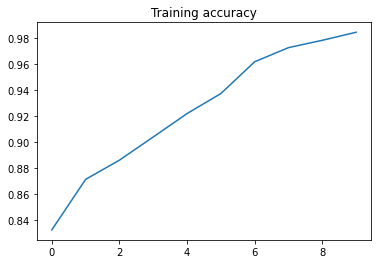

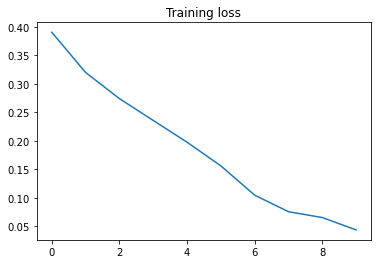

In [13]:
acc = history.history['acc']
loss = history.history['loss']

print(acc)
print(loss)

plt.plot(history.history['acc'])
plt.title('Training accuracy')


plt.figure()
#Train and validation loss
plt.plot(history.history['loss'])
plt.title('Training loss')


plt.show()

In [14]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

In [20]:
test_dry = [r'C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\test\Dry waste\resized_dry\{}'.format(i) for i in os.listdir(r'C://Users/Shireen.intel//Desktop//Shireen//WASTE MANAGER PROGRAM//test//Dry waste//resized_dry')]  #get smoke images
test_wet = [r'C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet\{}'.format(i) for i in os.listdir(r'C:\Users\Shireen.intel\Desktop\Shireen\WASTE MANAGER PROGRAM\train\Wet waste\resized_wet')]

Y_test_dry = [0 for i in test_dry]
Y_test_wet = [1 for i in test_wet]


X_test = test_dry + test_wet
Y_test = Y_test_dry + Y_test_wet

print(len(X_test), len(Y_test)) 

test = pd.DataFrame({'X': X_test, 'Y': Y_test})

7025 7025


In [21]:
X = []
nrows = 64
ncolumns = 64
channels = 3 
i = 0
for image in test.X:
    im = cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows,ncolumns), interpolation=cv2.INTER_CUBIC)
    X.append(im)  
    
    i += 1
    
Xnp = np.asarray(X)

In [22]:
results = cnn.evaluate(Xnp,to_categorical(test[['Y']]), batch_size = 2)
print(results)

3513/3513 [==============================] - 15s 4ms/step - loss: 46.5767 - acc: 0.9433
[46.57668685913086, 0.9433451890945435]


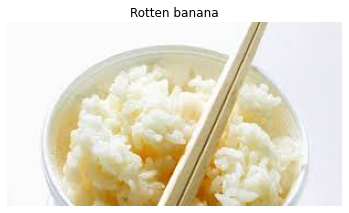

0
Dry waste


In [17]:
import tensorflow as tf
test= cv2.imread(r'C:\Users\Shireen.intel\Desktop\Shireen\Wet waste (11447).jpg')
test_col = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
plt.imshow(test_col)
plt.title('Rotten banana')
plt.axis('off')
plt.show()
image_size=(im.shape[1::-1])
img = keras.preprocessing.image.load_img(r'C:\Users\Shireen.intel\Desktop\Shireen\Wet waste (11447).jpg', target_size=image_size)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = cnn.predict(img_array).argmax()
print(predictions)
if predictions == [1]:
    print("Wet waste")
elif predictions == [0]:
    print("Dry waste")
